# Homework 05: Implementing denoising autoencoder for medical images

## Part 1: Prepare the training/validation/test sets for medical images

In [1]:
#@title Task 1: Download the images

# images stored in Dental_Images.zip

In [2]:
import os
import numpy as np
from PIL import Image

def load_and_resize_images(root_folder, target_size=(64, 64)):
    """
    Recursively loads all JPG images (with .jpg or .jpeg extensions) from the specified
    root folder and its subdirectories, resizes them to target_size, converts them to
    NumPy arrays, and returns a list of these arrays.

    Args:
        root_folder (str): The path to the root folder containing the images or subdirectories.
        target_size (tuple): The desired image size as (width, height). Defaults to (64, 64).

    Returns:
        List[np.ndarray]: A list of NumPy arrays representing the resized images.
    """
    image_arrays = []  # List to store NumPy arrays of the images
    valid_extensions = (".jpg", ".jpeg")  # Acceptable file extensions

    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.lower().endswith(valid_extensions):
                image_path = os.path.join(dirpath, filename)
                print("Processing:", image_path)  # Debug print to show file being processed
                try:
                    with Image.open(image_path) as img:
                        # Convert to grayscale
                        img_gray = img.convert("L")
                        # Resize the image to the target size
                        img_resized = img.resize(target_size)
                        # Convert the image to a NumPy array and add to the list
                        img_array = np.array(img_resized)
                        image_arrays.append(img_array)
                except Exception as e:
                    print(f"Error loading {filename}: {e}")
            else:
                print(f"Skipping file (wrong extension): {filename}")

    return image_arrays

if __name__ == "__main__":
    folder = "/content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images"
    images = load_and_resize_images(folder)
    print(f"Loaded {len(images)} images.")
    if images:
        print(f"Shape of the first image: {images[0].shape}")


Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/61.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/65.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/88.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/63.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/59.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/60.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/49.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/77.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/71.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/74.jpg
Processing: /content/drive/MyDrive/CSCI5930/Homework_05/Dental_Images/Dental_Images/75.jpg

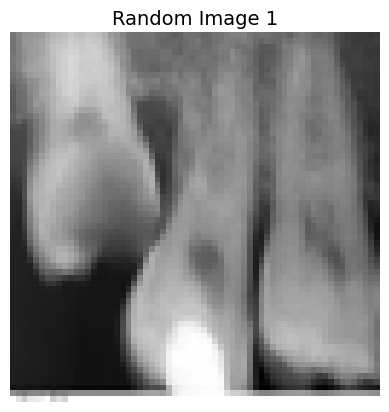

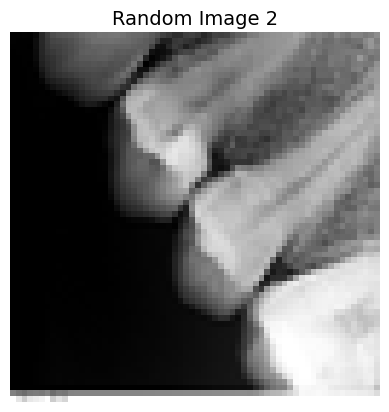

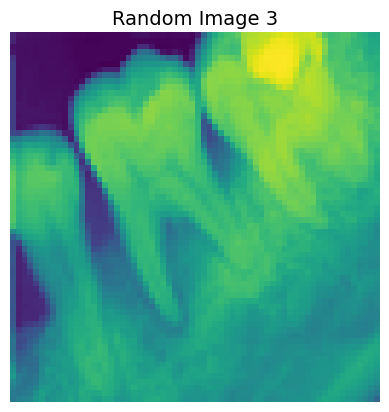

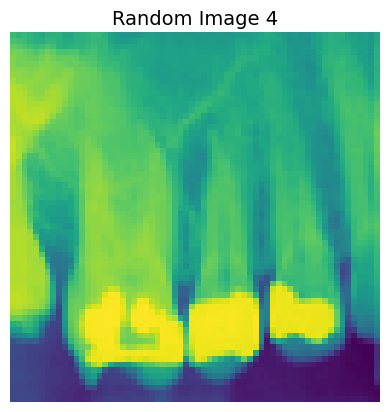

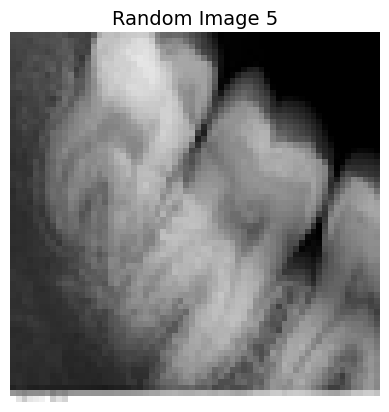

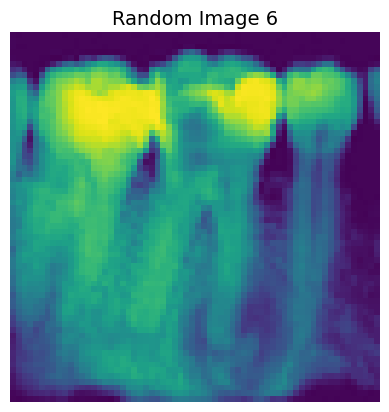

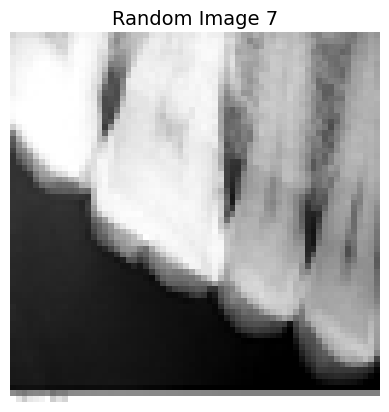

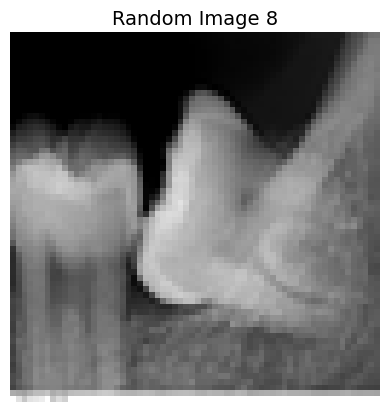

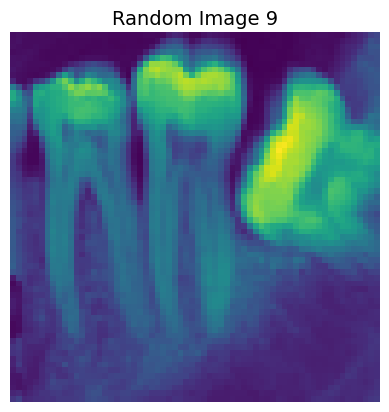

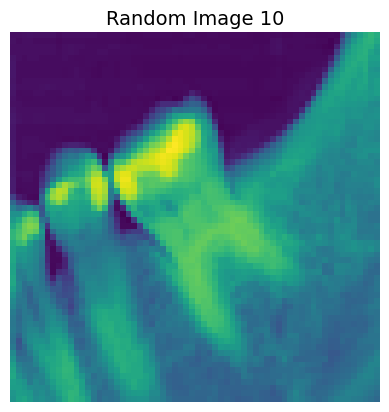

In [3]:
#@title Task 3: Randomly select 10 images from the loaded dataset, and visualize the images

import matplotlib.pyplot as plt
import random

# set these variables to make the images look better when visualized
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# Randomly select images
selected_images = random.sample(images, 10)

for idx, img in enumerate(selected_images, start=1):
  plt.figure()       # Create a new figure for each image
  plt.imshow(img)    # Display the image
  plt.title(f"Random Image {idx}")
  plt.axis("off")    # Hide the axis ticks and labels
  plt.show()         # Render the image


In [4]:
import numpy as np
from PIL import Image

def convert_image_to_grayscale(image):
    """
    Converts an image (numpy array) to grayscale if it is not already.

    Args:
        image (np.ndarray): Input image array.

    Returns:
        np.ndarray: Grayscale image with shape (64, 64).
    """
    # If the image has 3 channels (assumed to be RGB), convert it using PIL.
    if image.ndim == 3 and image.shape[-1] == 3:
        # Create a PIL image from the numpy array
        pil_img = Image.fromarray(image)
        # Convert the image to grayscale ('L' mode returns an 8-bit grayscale image)
        gray_img = pil_img.convert("L")
        # Convert back to numpy array
        return np.array(gray_img)
    elif image.ndim == 2:
        # Already grayscale
        return image
    else:
        raise ValueError(f"Unexpected image shape: {image.shape}")

# Convert all images to grayscale (ensuring they have shape (64, 64))
grayscale_images = [convert_image_to_grayscale(img) for img in images]

# Verify all images now have the shape (64, 64)
for i, img in enumerate(grayscale_images):
    print(f"Image {i}: shape {img.shape}")

Image 0: shape (64, 64)
Image 1: shape (64, 64)
Image 2: shape (64, 64)
Image 3: shape (64, 64)
Image 4: shape (64, 64)
Image 5: shape (64, 64)
Image 6: shape (64, 64)
Image 7: shape (64, 64)
Image 8: shape (64, 64)
Image 9: shape (64, 64)
Image 10: shape (64, 64)
Image 11: shape (64, 64)
Image 12: shape (64, 64)
Image 13: shape (64, 64)
Image 14: shape (64, 64)
Image 15: shape (64, 64)
Image 16: shape (64, 64)
Image 17: shape (64, 64)
Image 18: shape (64, 64)
Image 19: shape (64, 64)
Image 20: shape (64, 64)
Image 21: shape (64, 64)
Image 22: shape (64, 64)
Image 23: shape (64, 64)
Image 24: shape (64, 64)
Image 25: shape (64, 64)
Image 26: shape (64, 64)
Image 27: shape (64, 64)
Image 28: shape (64, 64)
Image 29: shape (64, 64)
Image 30: shape (64, 64)
Image 31: shape (64, 64)
Image 32: shape (64, 64)
Image 33: shape (64, 64)
Image 34: shape (64, 64)
Image 35: shape (64, 64)
Image 36: shape (64, 64)
Image 37: shape (64, 64)
Image 38: shape (64, 64)
Image 39: shape (64, 64)
Image 40: 

In [5]:
#@title Task 4: Define a function to map original images into noisy images by randomly adding Gaussian noise or dropout layer

import numpy as np
import matplotlib.pyplot as plt
import random

def add_noise(image, noise_type="gaussian", sigma=25, dropout_rate=0.3):
    """

    Parameters:
        image (np.ndarray): The original image as a NumPy array.
        noise_type (str): The type of noise to add. Options are "gaussian" or "dropout".
        sigma (float): Standard deviation for Gaussian noise (used if noise_type=="gaussian").
                       For images in range [0,255] a sigma of around 25 is common.
        dropout_rate (float): Fraction of pixels to drop (set to 0) for dropout noise.

    Returns:
        noisy_image (np.ndarray): The image with added noise.
    """
    # Ensure we're working on a copy so as not to modify the original image
    image = image.copy().astype(np.float32)

    if noise_type == "gaussian":
        # Create Gaussian noise with mean 0 and standard deviation sigma
        noise = np.random.normal(0, sigma, image.shape)
        noisy_image = image + noise
    elif noise_type == "dropout":
        # Create a dropout mask, where pixels with random value < dropout_rate are dropped (set to 0)
        mask = np.random.rand(*image.shape) > dropout_rate
        noisy_image = image * mask
    else:
        raise ValueError("Invalid noise_type. Choose 'gaussian' or 'dropout'.")

    # Clip values to valid range (assuming the image is in [0, 255])
    noisy_image = np.clip(noisy_image, 0, 255)
    # Convert back to unsigned 8-bit integer
    return noisy_image.astype(np.uint8)

def map_images_to_noisy(images, noise_type="gaussian", sigma=25, dropout_rate=0.3):
    """
    Maps a list of original images to a list of tuples, each containing the original image
    and its noisy version.

    Parameters:
        images (list of np.ndarray): List of images.
        noise_type (str): Type of noise to add ("gaussian" or "dropout").
        sigma (float): Standard deviation for Gaussian noise.
        dropout_rate (float): Dropout rate for dropout noise.

    Returns:
        List[tuple]: A list of tuples (original_image, noisy_image).
    """
    mapped_images = []
    for img in images:
        noisy_img = add_noise(img, noise_type=noise_type, sigma=sigma, dropout_rate=dropout_rate)
        mapped_images.append((img, noisy_img))
    return mapped_images

# Map the original images to noisy images using Gaussian noise (or change noise_type to "dropout")
image_pairs = map_images_to_noisy(grayscale_images, noise_type="gaussian", sigma=25, dropout_rate=0.3)

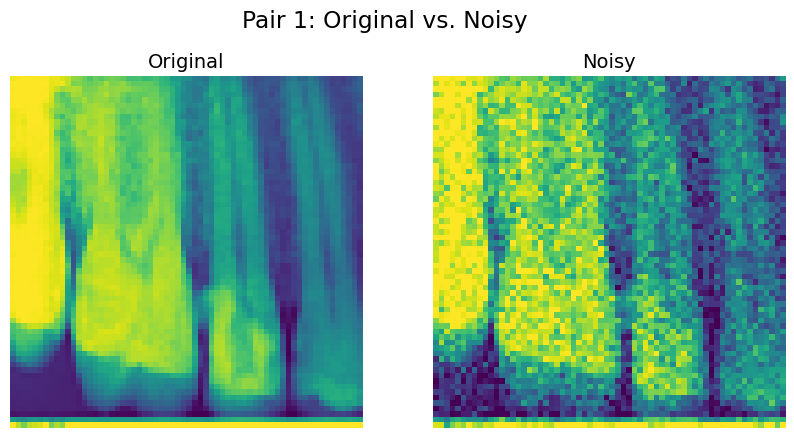

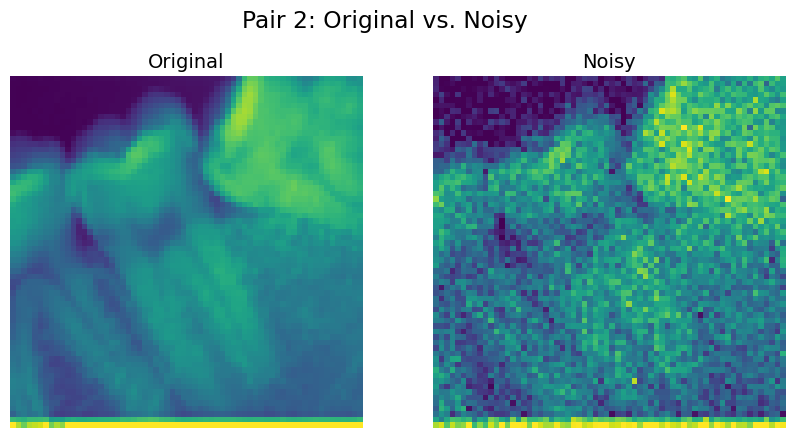

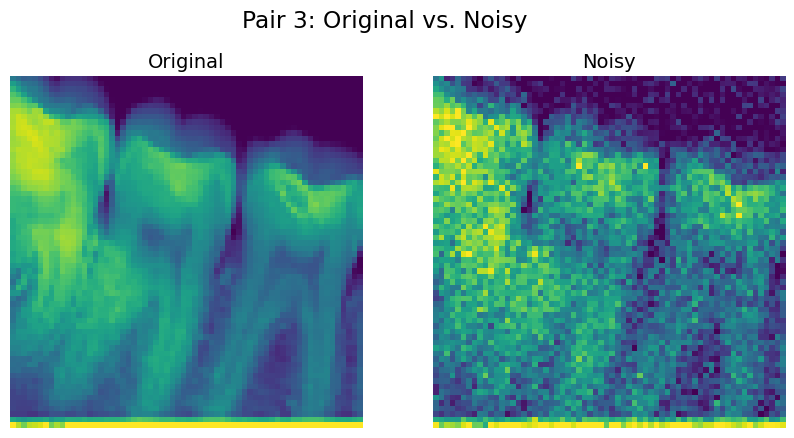

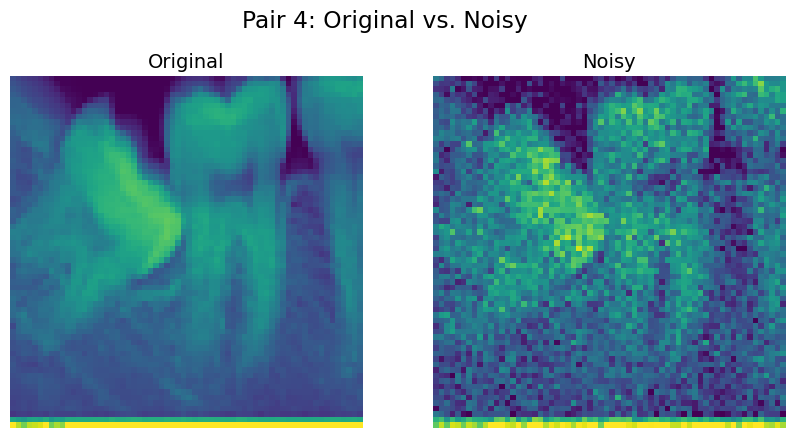

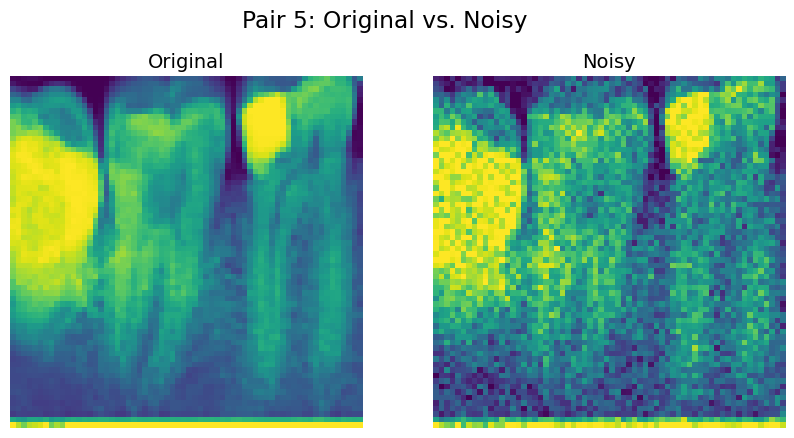

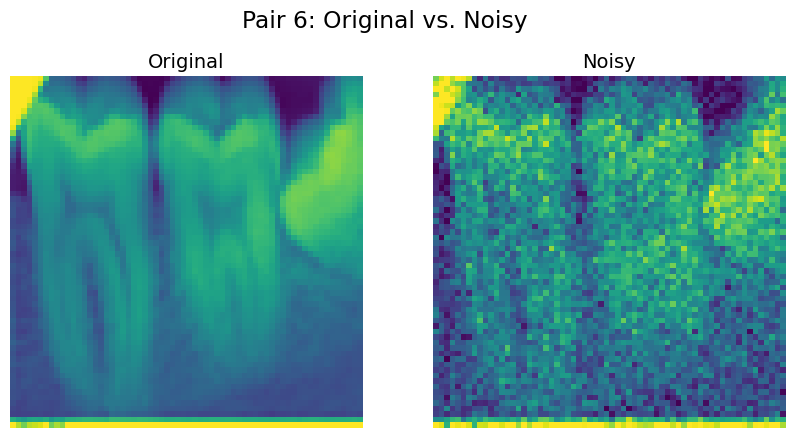

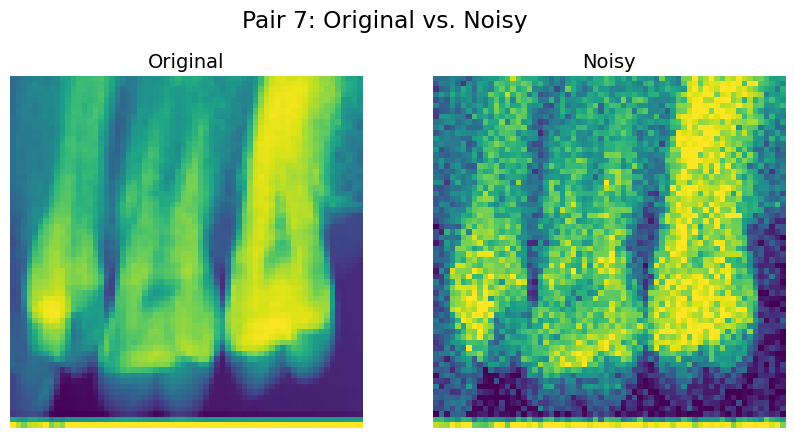

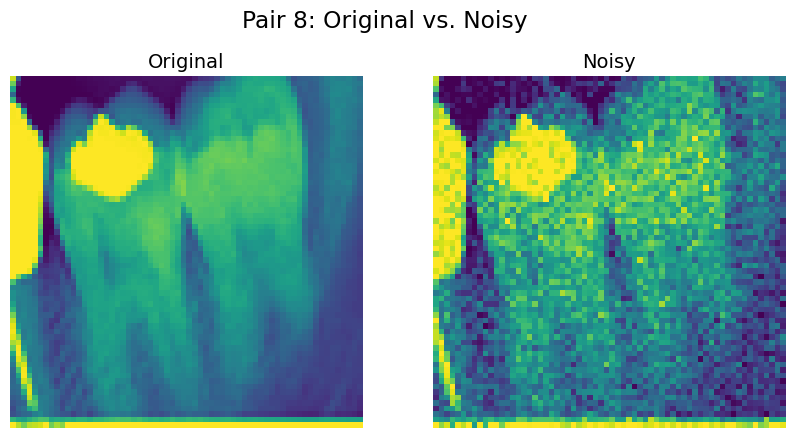

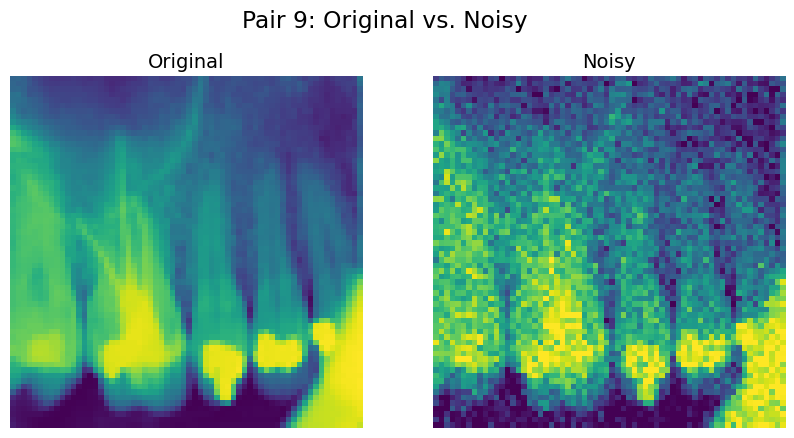

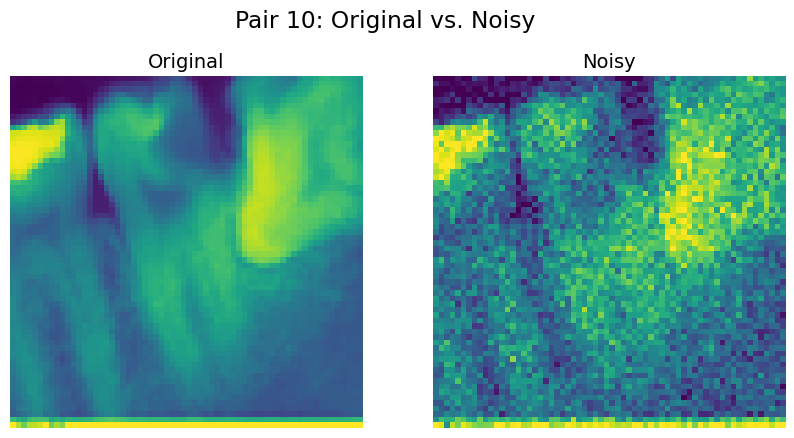

In [6]:
#@title Task 5: Randomly select 10 images from the loaded dataset, and visualize both original images and perturbed images

def display_side_by_side(image_pair, title="Comparison"):
    """
    Displays an original image and its corresponding noisy image side by side.

    Parameters:
        image_pair (tuple): A tuple (original_image, noisy_image).
        title (str): The title for the entire figure.
    """
    original, noisy = image_pair

    plt.figure(figsize=(10, 5))

    # Display original image
    plt.subplot(1, 2, 1)
    plt.imshow(original)
    plt.title("Original")
    plt.axis("off")

    # Display noisy image
    plt.subplot(1, 2, 2)
    plt.imshow(noisy)
    plt.title("Noisy")
    plt.axis("off")

    plt.suptitle(title)
    plt.show()

# Randomly select 10 pairs and display them side by side
num_to_show = 10
if len(image_pairs) < num_to_show:
    print(f"Only {len(image_pairs)} image pairs available. Displaying all of them.")
    selected_pairs = image_pairs
else:
    selected_pairs = random.sample(image_pairs, num_to_show)

for idx, pair in enumerate(selected_pairs, start=1):
    display_side_by_side(pair, title=f"Pair {idx}: Original vs. Noisy")

In [7]:
#@title Task 6: Prepare Train/validation/test set with ratio 8:1:1, and report the shape of noisy images (X) and original images (Y) for autoencoder training

import numpy as np
from sklearn.model_selection import train_test_split

X = np.array([pair[1] for pair in image_pairs])
Y = np.array([pair[0] for pair in image_pairs])

X_train, X_temp, Y_train, Y_temp = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

X_val, X_test, Y_val, Y_test = train_test_split(
    X_temp, Y_temp, test_size=0.5, random_state=42
)

# Print the shapes for verification
print("Training set: X shape:", X_train.shape, "Y shape:", Y_train.shape)
print("Validation set: X shape:", X_val.shape, "Y shape:", Y_val.shape)
print("Test set: X shape:", X_test.shape, "Y shape:", Y_test.shape)

Training set: X shape: (96, 64, 64) Y shape: (96, 64, 64)
Validation set: X shape: (12, 64, 64) Y shape: (12, 64, 64)
Test set: X shape: (12, 64, 64) Y shape: (12, 64, 64)


## Part 2: Design Autoencoder algorithms for medical image denoising

In [8]:
#@title Task 7: Create a deep stacked autoencoder with dense layers that support input noisy images and output original images

import tensorflow as tf

tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[64, 64]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(64 * 64),
    tf.keras.layers.Reshape([64, 64])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())

stacked_ae.build(input_shape=(None, 64, 64))

stacked_ae.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 30)             │       412,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 64, 64)         │       416,796 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,526 (3.16 MB)

 Trainable params: 829,526 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
#@title Task 8: After successfully designing the models, create a simulated dataset (i.e., random input X and output Y) and send them to the model to test the model training

num_samples = 1000
X = np.random.rand(num_samples, 64, 64).astype(np.float32)  # Simulated input images
Y = X.copy()  # For autoencoder training, target images are the same as input images

# Train the autoencoder on the simulated dataset
history = stacked_ae.fit(X, Y, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.1867 - val_loss: 0.0855
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0848 - val_loss: 0.0866
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0848 - val_loss: 0.0845
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0843 - val_loss: 0.0844
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0843 - val_loss: 0.0844


In [10]:
#@title Task 9: After successfully setting up the deep stacked autoencoder with dense layers for model training, fit the algorithm on the medical dataset prepared in Part I

# scale the images
X_train = X_train.astype('float32') / 255.
X_val   = X_val.astype('float32')   / 255.
Y_train = Y_train.astype('float32') / 255.
Y_val   = Y_val.astype('float32')   / 255.
X_test  = X_test.astype('float32')  / 255.
Y_test  = Y_test.astype('float32')  / 255.

# Train the autoencoder on the training dataset
history = stacked_ae.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step - loss: 0.0523 - val_loss: 0.0494
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0486 - val_loss: 0.0483
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0465 - val_loss: 0.0489
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0463 - val_loss: 0.0492
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0464 - val_loss: 0.0490
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0461 - val_loss: 0.0483
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0461 - val_loss: 0.0482
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0460 - val_loss: 0.0486
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0473 - val_loss: 0.0494
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0471 - val_loss: 0.0490
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0470 - val_loss: 0.0476
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0454 - val_loss: 0.0474


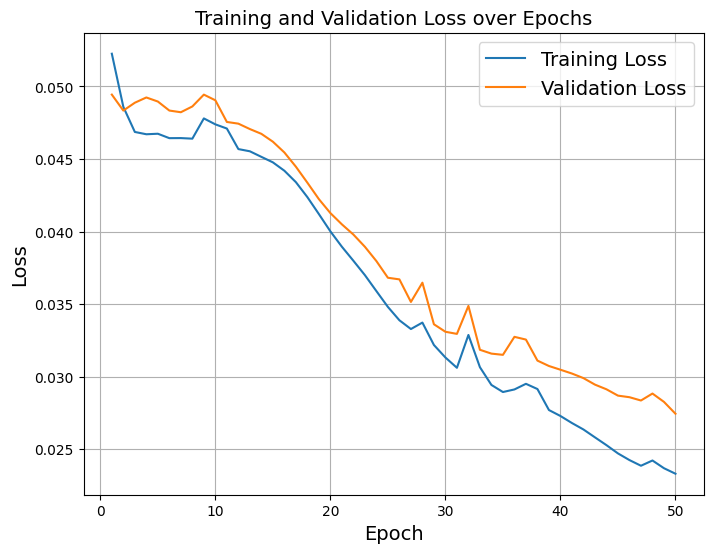

In [11]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
import numpy as np
import tensorflow as tf

preds = stacked_ae.predict(X_test)

mse = np.mean(np.square(preds - Y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")


psnr_per_image = tf.image.psnr(Y_test, preds, max_val=1.0)  # returns a tensor of shape (n_samples,)
mean_psnr = tf.reduce_mean(psnr_per_image).numpy()
print(f"Mean PSNR: {mean_psnr:.2f} dB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Mean Squared Error (MSE): 0.03
Mean PSNR: 15.82 dB


In [13]:
#@title Task 10: For the architecture determined in Task 3, try at least three different number of hidden neurons in latent space and determine the model with lowest reconstruction errors on validation set

import tensorflow as tf

tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[64, 64]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(64 * 64),
    tf.keras.layers.Reshape([64, 64])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())

stacked_ae.build(input_shape=(None, 64, 64))

stacked_ae.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (None, 30)             │       412,730 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 64, 64)         │       416,796 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 829,526 (3.16 MB)

 Trainable params: 829,526 (3.16 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Train the autoencoder on the training dataset
history = stacked_ae.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step - loss: 0.2646 - val_loss: 0.1875
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.1692 - val_loss: 0.0956
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0901 - val_loss: 0.0611
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0579 - val_loss: 0.0512
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0493 - val_loss: 0.0493
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0475 - val_loss: 0.0490
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0471 - val_loss: 0.0486
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0467 - val_loss: 0.0487
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0469 - val_loss: 0.0492
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0473 - val_loss: 0.0496
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0475 - val_loss: 0.0482
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 0.0460 - val_loss: 0.0477


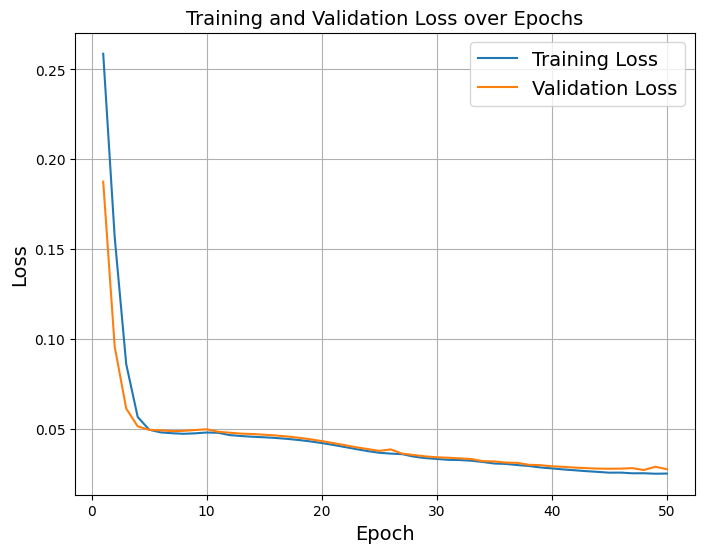

In [15]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
import numpy as np
import tensorflow as tf

preds = stacked_ae.predict(X_test)

mse = np.mean(np.square(preds - Y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")


psnr_per_image = tf.image.psnr(Y_test, preds, max_val=1.0)  # returns a tensor of shape (n_samples,)
mean_psnr = tf.reduce_mean(psnr_per_image).numpy()
print(f"Mean PSNR: {mean_psnr:.2f} dB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
Mean Squared Error (MSE): 0.03
Mean PSNR: 15.83 dB


In [17]:
import tensorflow as tf

tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[64, 64]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(64 * 64),
    tf.keras.layers.Reshape([64, 64])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())

stacked_ae.build(input_shape=(None, 64, 64))

stacked_ae.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 50)             │       414,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 64, 64)         │       418,796 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 833,546 (3.18 MB)

 Trainable params: 833,546 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Train the autoencoder on the training dataset
history = stacked_ae.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 191ms/step - loss: 0.2656 - val_loss: 0.1880
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1697 - val_loss: 0.1002
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0903 - val_loss: 0.0702
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0644 - val_loss: 0.0518
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0494 - val_loss: 0.0492
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0473 - val_loss: 0.0486
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0468 - val_loss: 0.0483
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0464 - val_loss: 0.0480
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0461 - val_loss: 0.0477
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0458 - val_loss: 0.0475
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0456 - val_loss: 0.0475
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0455 - val_loss: 0.0477


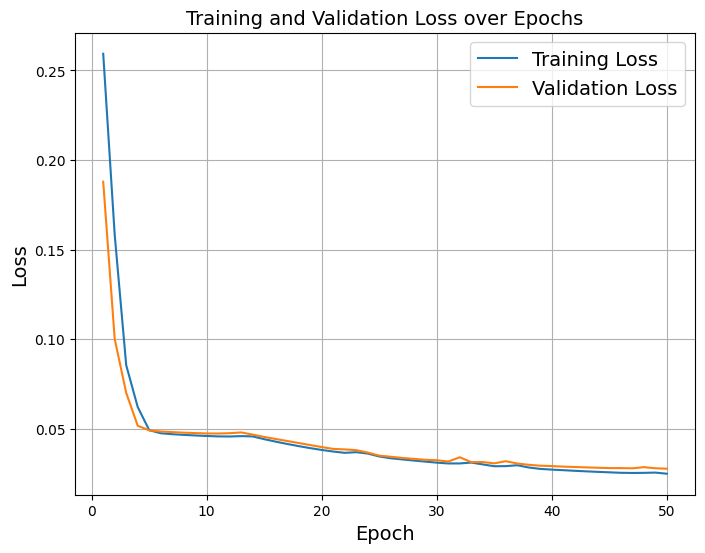

In [19]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
import numpy as np
import tensorflow as tf

preds = stacked_ae.predict(X_test)

mse = np.mean(np.square(preds - Y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")


psnr_per_image = tf.image.psnr(Y_test, preds, max_val=1.0)  # returns a tensor of shape (n_samples,)
mean_psnr = tf.reduce_mean(psnr_per_image).numpy()
print(f"Mean PSNR: {mean_psnr:.2f} dB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step
Mean Squared Error (MSE): 0.03
Mean PSNR: 15.65 dB


In [21]:
import tensorflow as tf

tf.random.set_seed(42)  # extra code – ensures reproducibility on CPU

stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[64, 64]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(75, activation="relu"),
])
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(64 * 64),
    tf.keras.layers.Reshape([64, 64])
])
stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])

stacked_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())

stacked_ae.build(input_shape=(None, 64, 64))

stacked_ae.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_9 (Sequential)       │ (None, 75)             │       417,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_10 (Sequential)      │ (None, 64, 64)         │       421,296 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838,571 (3.20 MB)

 Trainable params: 838,571 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Train the autoencoder on the training dataset
history = stacked_ae.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=50, batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 313ms/step - loss: 0.2673 - val_loss: 0.1907
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.1698 - val_loss: 0.0947
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0874 - val_loss: 0.0642
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 0.0590 - val_loss: 0.0525
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0499 - val_loss: 0.0492
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0475 - val_loss: 0.0487
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0468 - val_loss: 0.0483
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0464 - val_loss: 0.0480
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 0.0460 - val_loss: 0.0477
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.0457 - val_loss: 0.0475
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0454 - val_loss: 0.0473
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0450 - val_loss: 0.047

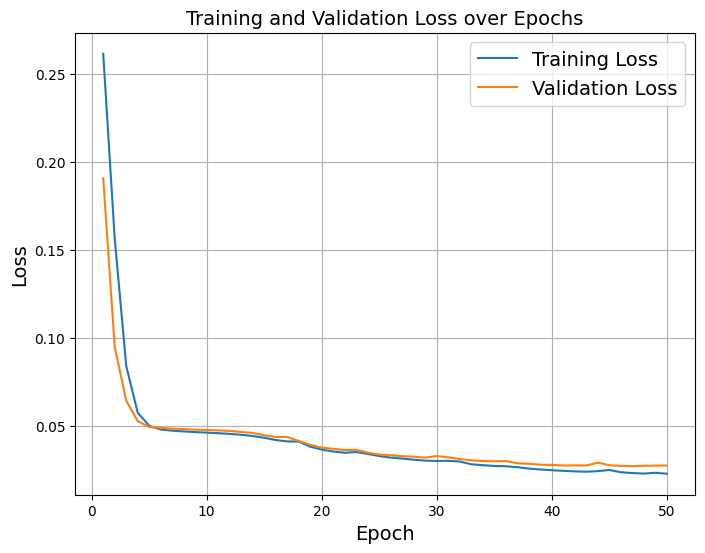

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
import numpy as np
import tensorflow as tf

preds = stacked_ae.predict(X_test)

mse = np.mean(np.square(preds - Y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")


psnr_per_image = tf.image.psnr(Y_test, preds, max_val=1.0)  # returns a tensor of shape (n_samples,)
mean_psnr = tf.reduce_mean(psnr_per_image).numpy()
print(f"Mean PSNR: {mean_psnr:.2f} dB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Mean Squared Error (MSE): 0.03
Mean PSNR: 16.00 dB


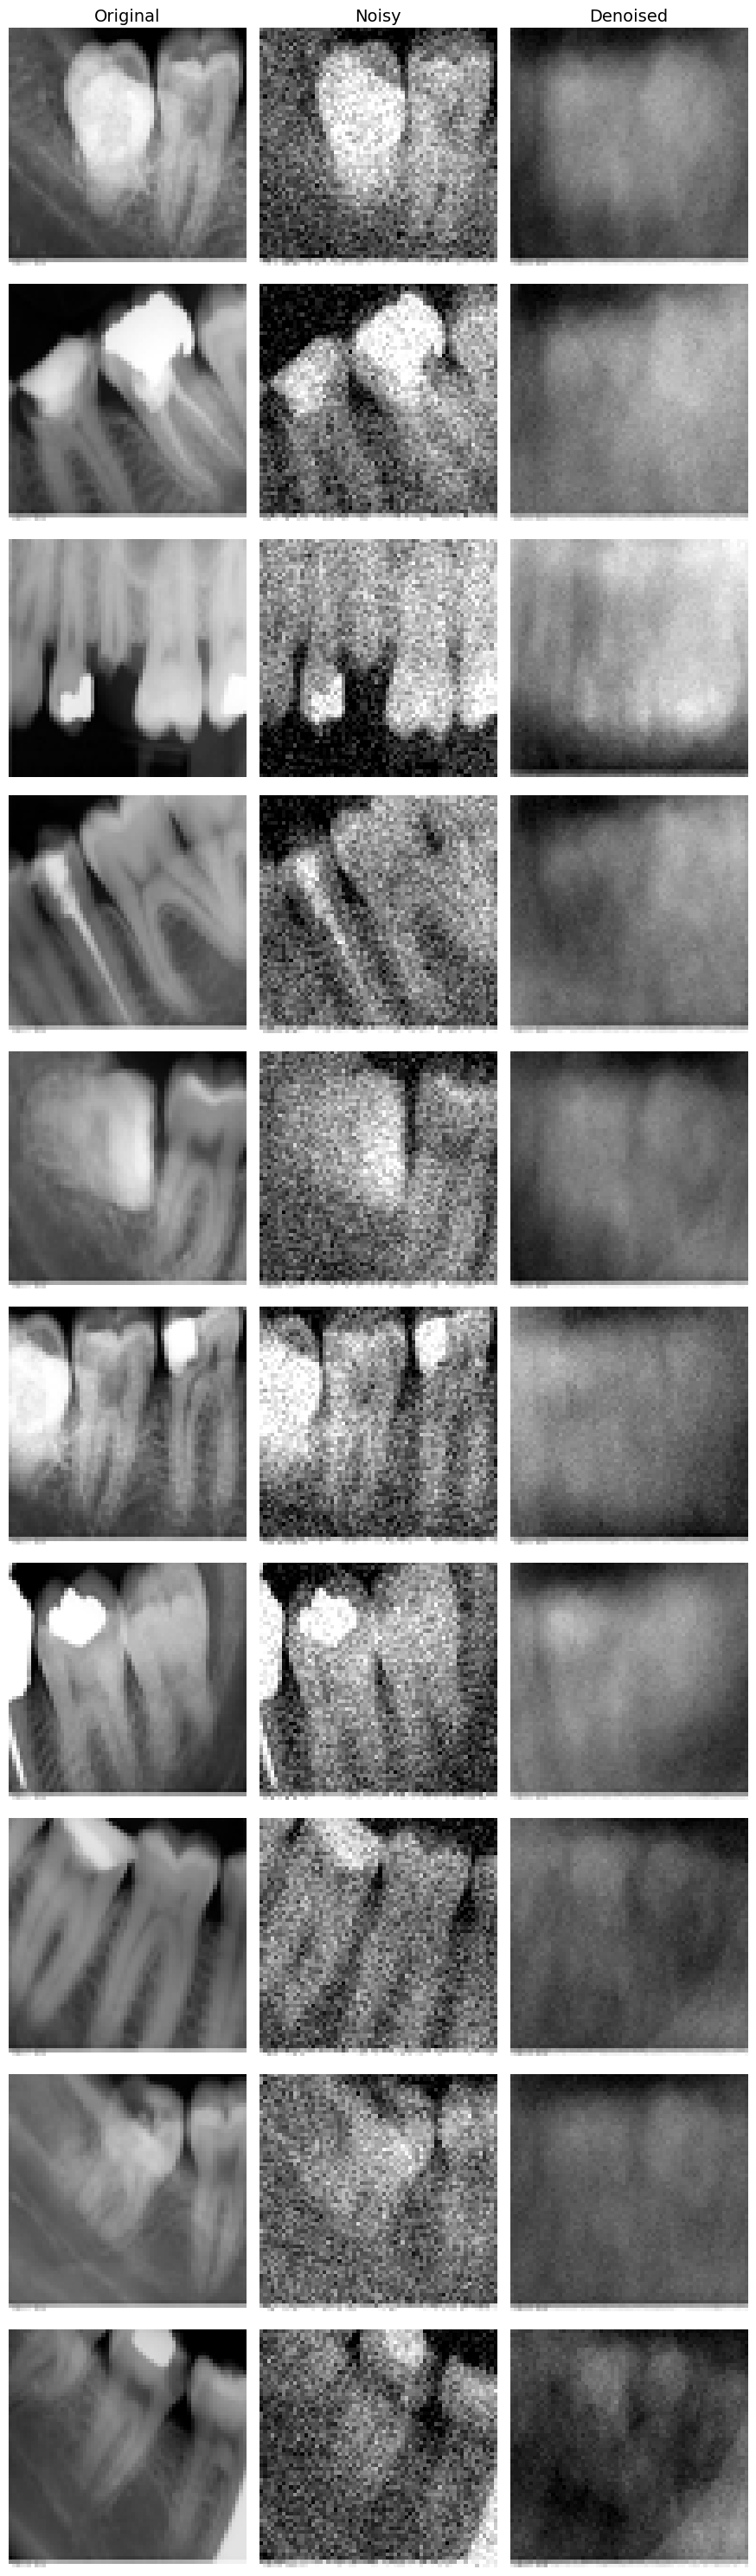

In [46]:
#@title Use the best model to visualize 10 images and show the original, noisy image and denoised image from autoencoder

import numpy as np
import matplotlib.pyplot as plt

# Create a figure with 10 rows and 3 columns: original / noisy / denoised
fig, axes = plt.subplots(10, 3, figsize=(9, 3 * 10))

for i, (orig, noisy) in enumerate(image_pairs[:10]):
    # 1) Predict denoised from the noisy image
    noisy_input = np.expand_dims(noisy, axis=0)      # add batch dimension
    denoised = stacked_ae.predict(noisy_input, verbose=0)[0]  # remove batch dim

    # 2) Plot original
    ax = axes[i, 0]
    ax.imshow(orig, cmap='gray')
    if i == 0: ax.set_title('Original')
    ax.axis('off')

    # 3) Plot noisy
    ax = axes[i, 1]
    ax.imshow(noisy, cmap='gray')
    if i == 0: ax.set_title('Noisy')
    ax.axis('off')

    # 4) Plot denoised
    ax = axes[i, 2]
    ax.imshow(denoised, cmap='gray')
    if i == 0: ax.set_title('Denoised')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [25]:
#@title Task 11: Modify the above autoencoder in Task 9 to deep convolutional autoencoder using 2D convolution.   Try at least three different number of hidden neurons in latent space and determine the model with lowest reconstruction errors on validation set

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

tf.random.set_seed(42)  # reproducibility

# Encoder
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)),         # add channel dim
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 32×32×32
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 16×16×64
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 8×8×128
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(30, activation="relu"),     # bottleneck
])

# Decoder
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(30,)),               # match encoder output
    tf.keras.layers.Dense(8 * 8 * 128, activation="relu"),
    tf.keras.layers.Reshape((8, 8, 128)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 16×16×128
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 32×32×64
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 64×64×32
    Conv2D(1, (3, 3), activation="sigmoid", padding="same"),
    tf.keras.layers.Reshape((64, 64)),                # drop channel dim
])

# Autoencoder
cnn_stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])
cnn_stacked_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
cnn_stacked_ae.build(input_shape=(None, 64, 64, 1))

cnn_stacked_ae.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)      │ (None, 30)             │       338,462 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_13 (Sequential)      │ (None, 64, 64)         │       494,081 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 832,543 (3.18 MB)

 Trainable params: 832,543 (3.18 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
X_train_cnn = X_train[..., None]
X_val_cnn   = X_val[...,   None]
X_test_cnn  = X_test[...,  None]
Y_train_cnn = Y_train[..., None]
Y_val_cnn   = Y_val[...,   None]
Y_test_cnn  = Y_test[...,  None]

In [27]:
# Train the autoencoder on the training dataset
history = cnn_stacked_ae.fit(X_train_cnn, Y_train_cnn, validation_data=(X_val_cnn, Y_val_cnn), epochs=50, batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 794ms/step - loss: 0.0595 - val_loss: 0.0554
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.0596 - val_loss: 0.0558
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0577 - val_loss: 0.0548
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0563 - val_loss: 0.0532
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0545 - val_loss: 0.0527
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0536 - val_loss: 0.0522
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0527 - val_loss: 0.0514
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0516 - val_loss: 0.0518
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0506 - val_loss: 0.0490
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0497 - val_loss: 0.0476
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0477 - val_loss: 0.0442
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.0433 - val_loss: 0.0424

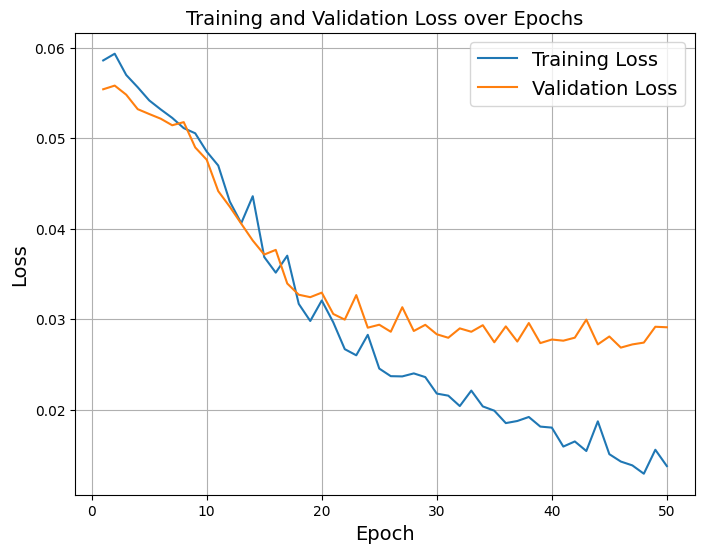

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
import numpy as np
import tensorflow as tf

preds = cnn_stacked_ae.predict(X_test_cnn)

mse = np.mean(np.square(preds - Y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")


psnr_per_image = tf.image.psnr(Y_test, preds, max_val=1.0)  # returns a tensor of shape (n_samples,)
mean_psnr = tf.reduce_mean(psnr_per_image).numpy()
print(f"Mean PSNR: {mean_psnr:.2f} dB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 948ms/step
Mean Squared Error (MSE): 0.03
Mean PSNR: 15.88 dB


In [30]:

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

tf.random.set_seed(42)  # reproducibility

# Encoder
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)),         # add channel dim
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 32×32×32
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 16×16×64
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 8×8×128
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation="relu"),     # bottleneck
])

# Decoder
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(50,)),               # match encoder output
    tf.keras.layers.Dense(8 * 8 * 128, activation="relu"),
    tf.keras.layers.Reshape((8, 8, 128)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 16×16×128
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 32×32×64
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 64×64×32
    Conv2D(1, (3, 3), activation="sigmoid", padding="same"),
    tf.keras.layers.Reshape((64, 64)),                # drop channel dim
])

# Autoencoder
cnn_stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])
cnn_stacked_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
cnn_stacked_ae.build(input_shape=(None, 64, 64, 1))

cnn_stacked_ae.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_15 (Sequential)      │ (None, 50)             │       502,322 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_16 (Sequential)      │ (None, 64, 64)         │       657,921 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,160,243 (4.43 MB)

 Trainable params: 1,160,243 (4.43 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# Train the autoencoder on the training dataset
history = cnn_stacked_ae.fit(X_train_cnn, Y_train_cnn, validation_data=(X_val_cnn, Y_val_cnn), epochs=50, batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 452ms/step - loss: 0.0592 - val_loss: 0.0559
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0582 - val_loss: 0.0554
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0570 - val_loss: 0.0538
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0555 - val_loss: 0.0533
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0544 - val_loss: 0.0528
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0535 - val_loss: 0.0519
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0524 - val_loss: 0.0504
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0506 - val_loss: 0.0514
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0524 - val_loss: 0.0467
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0466 - val_loss: 0.0424
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0420 - val_loss: 0.0475
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.0439 - val_loss: 0.0382


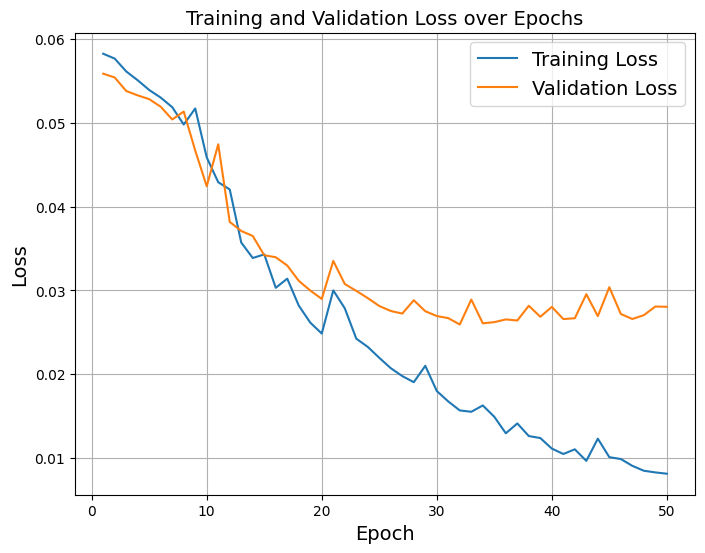

In [32]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
import numpy as np
import tensorflow as tf

preds = cnn_stacked_ae.predict(X_test_cnn)

mse = np.mean(np.square(preds - Y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")


psnr_per_image = tf.image.psnr(Y_test, preds, max_val=1.0)  # returns a tensor of shape (n_samples,)
mean_psnr = tf.reduce_mean(psnr_per_image).numpy()
print(f"Mean PSNR: {mean_psnr:.2f} dB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 634ms/step
Mean Squared Error (MSE): 0.03
Mean PSNR: 15.78 dB


In [34]:

import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

tf.random.set_seed(42)  # reproducibility

# Encoder
stacked_encoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(64, 64, 1)),         # add channel dim
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 32×32×32
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 16×16×64
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    MaxPooling2D((2, 2), padding="same"),             # 8×8×128
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(75, activation="relu"),     # bottleneck
])

# Decoder
stacked_decoder = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(75,)),               # match encoder output
    tf.keras.layers.Dense(8 * 8 * 128, activation="relu"),
    tf.keras.layers.Reshape((8, 8, 128)),
    Conv2D(128, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 16×16×128
    Conv2D(64, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 32×32×64
    Conv2D(32, (3, 3), activation="relu", padding="same"),
    UpSampling2D((2, 2)),                             # 64×64×32
    Conv2D(1, (3, 3), activation="sigmoid", padding="same"),
    tf.keras.layers.Reshape((64, 64)),                # drop channel dim
])

# Autoencoder
CNN_stacked_ae = tf.keras.Sequential([stacked_encoder, stacked_decoder])
CNN_stacked_ae.compile(loss="mse", optimizer=tf.keras.optimizers.Nadam())
CNN_stacked_ae.build(input_shape=(None, 64, 64, 1))

CNN_stacked_ae.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_18 (Sequential)      │ (None, 75)             │       707,147 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_19 (Sequential)      │ (None, 64, 64)         │       862,721 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569,868 (5.99 MB)

 Trainable params: 1,569,868 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

In [35]:
# Train the autoencoder on the training dataset
history = CNN_stacked_ae.fit(X_train_cnn, Y_train_cnn, validation_data=(X_val_cnn, Y_val_cnn), epochs=50, batch_size=32)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 839ms/step - loss: 0.0595 - val_loss: 0.0568
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0587 - val_loss: 0.0536
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 0.0565 - val_loss: 0.0550
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0563 - val_loss: 0.0525
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0535 - val_loss: 0.0524
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0532 - val_loss: 0.0523
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0529 - val_loss: 0.0521
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0525 - val_loss: 0.0518
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0521 - val_loss: 0.0511
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0514 - val_loss: 0.0499
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0504 - val_loss: 0.0488
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0501 - val_loss: 0.0446

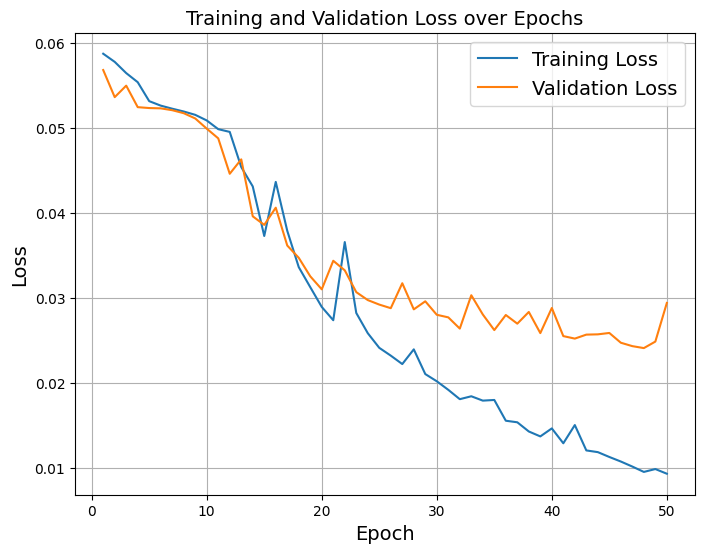

In [36]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
import numpy as np
import tensorflow as tf

preds = CNN_stacked_ae.predict(X_test_cnn)

mse = np.mean(np.square(preds - Y_test))
print(f"Mean Squared Error (MSE): {mse:.2f}")


psnr_per_image = tf.image.psnr(Y_test, preds, max_val=1.0)  # returns a tensor of shape (n_samples,)
mean_psnr = tf.reduce_mean(psnr_per_image).numpy()
print(f"Mean PSNR: {mean_psnr:.2f} dB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 860ms/step
Mean Squared Error (MSE): 0.03
Mean PSNR: 15.70 dB


In [40]:
#@title Task 12: Compare the reconstruction errors of training/validation/test images for both models from in Task 10 and Task 11 using MSE and PNSR.

import numpy as np
import tensorflow as tf
from skimage.metrics import peak_signal_noise_ratio

def compute_mse(X, X_pred):
    """
    Compute average mean squared error over all images.
    X, X_pred: arrays of shape (N, H, W[, C]) with pixel values in [0,1].
    """
    return np.mean((X - X_pred) ** 2)

def compute_psnr(X, X_pred, data_range=1.0):
    """
    Compute average PSNR (in dB) over all images using skimage.
    data_range should match the dynamic range of X (1.0 if X∈[0,1]).
    """
    psnrs = []
    for i in range(X.shape[0]):
        psnrs.append(
            peak_signal_noise_ratio(X[i], X_pred[i], data_range=data_range)
        )
    return np.mean(psnrs)

train_pred = stacked_ae.predict(X_train)
val_pred = stacked_ae.predict(X_val)
test_pred = stacked_ae.predict(X_test)


# compute metrics
test_mse  = compute_mse(Y_test, test_pred)
train_mse  = compute_mse(Y_train, train_pred)
val_mse  = compute_mse(Y_val, val_pred)

test_psnr = compute_psnr(Y_test, test_pred, data_range=1.0)
train_psnr = compute_psnr(Y_train, train_pred, data_range=1.0)
val_psnr = compute_psnr(Y_val, val_pred, data_range=1.0)

print("MSE and PSNR for the best stacked_ae model")
print(f"Test MSE: {test_mse:.2f}")
print(f"Train MSE: {train_mse:.2f}")
print(f"Val MSE: {val_mse:.2f}")

print(f"Test PSNR: {test_psnr:.2f} dB")
print(f"Train PSNR: {train_psnr:.2f} dB")
print(f"Val PSNR: {val_psnr:.2f} dB")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
MSE and PSNR for the best stacked_ae model
Test MSE: 0.03
Train MSE: 0.02
Val MSE: 0.03
Test PSNR: 16.28 dB
Train PSNR: 16.68 dB
Val PSNR: 15.98 dB


In [41]:
CNN_train_pred = CNN_stacked_ae.predict(X_train_cnn)
CNN_val_pred = CNN_stacked_ae.predict(X_val_cnn)
CNN_test_pred = CNN_stacked_ae.predict(X_test_cnn)


# compute metrics
CNN_test_mse  = compute_mse(Y_test, CNN_test_pred)
CNN_train_mse  = compute_mse(Y_train, CNN_train_pred)
CNN_val_mse  = compute_mse(Y_val, CNN_val_pred)

CNN_test_psnr = compute_psnr(Y_test, CNN_test_pred, data_range=1.0)
CNN_train_psnr = compute_psnr(Y_train, CNN_train_pred, data_range=1.0)
CNN_val_psnr = compute_psnr(Y_val, CNN_val_pred, data_range=1.0)

print("MSE and PSNR for the best CNN_stacked_ae model")
print(f"Test MSE: {CNN_test_mse:.2f}")
print(f"Train MSE: {CNN_train_mse:.2f}")
print(f"Val MSE: {CNN_val_mse:.2f}")

print(f"Test PSNR: {CNN_test_psnr:.2f} dB")
print(f"Train PSNR: {CNN_train_psnr:.2f} dB")
print(f"Val PSNR: {CNN_val_psnr:.2f} dB")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
MSE and PSNR for the best CNN_stacked_ae model
Test MSE: 0.03
Train MSE: 0.01
Val MSE: 0.03
Test PSNR: 16.11 dB
Train PSNR: 19.23 dB
Val PSNR: 15.61 dB


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


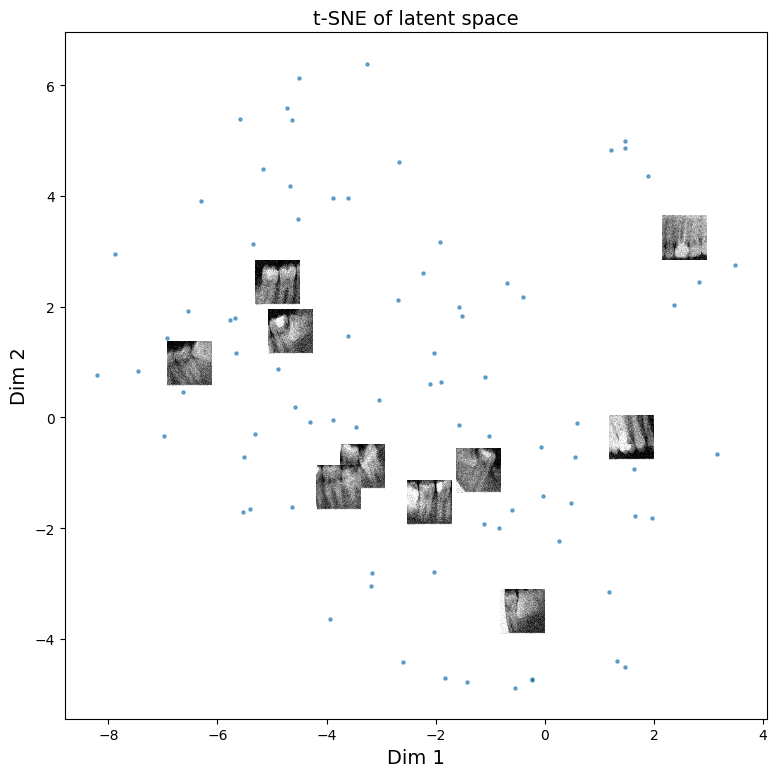

In [47]:
#@title Task 13: Using the two types of autoencoders defined in Task 10 and Task 11, visualizing the image’s hidden representation using TSNE and add representative medical images on top of TSNE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def plot_tsne_with_thumbnails(encoder, X, thumb_indices=None,
                              tsne_perplexity=30, random_state=42,
                              thumb_zoom=0.6, figsize=(8,8)):

    # 1) compute latent features
    Z = encoder.predict(X, batch_size=64)
    # ensure shape (N, D)
    Z = Z.reshape(Z.shape[0], -1)

    # 2) run t-SNE
    tsne = TSNE(n_components=2, perplexity=tsne_perplexity,
                random_state=random_state)
    Z2 = tsne.fit_transform(Z)   # shape (N,2)

    N = X.shape[0]
    if thumb_indices is None:
        thumb_indices = np.random.choice(N, min(10, N), replace=False)

    # 4) plot
    fig, ax = plt.subplots(figsize=figsize)
    ax.scatter(Z2[:,0], Z2[:,1], s=5, alpha=0.6)
    ax.set_title("t-SNE of latent space")
    ax.set_xlabel("Dim 1")
    ax.set_ylabel("Dim 2")

    # 5) overlay thumbnails
    for idx in thumb_indices:
        x0, y0 = Z2[idx]
        img = X[idx]
        # if grayscale H×W, squeeze; if (H,W,1) drop last dim
        img = img.squeeze()
        im = OffsetImage(img, zoom=thumb_zoom, cmap='gray')
        ab = AnnotationBbox(im, (x0, y0), frameon=False)
        ax.add_artist(ab)

    plt.tight_layout()
    plt.show()


# get encoder sub-models
flat_encoder = stacked_ae.layers[0]
cnn_encoder  = CNN_stacked_ae.layers[0]

# visualize the flat-AE latent space
plot_tsne_with_thumbnails(flat_encoder, X_train, thumb_zoom=0.5)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


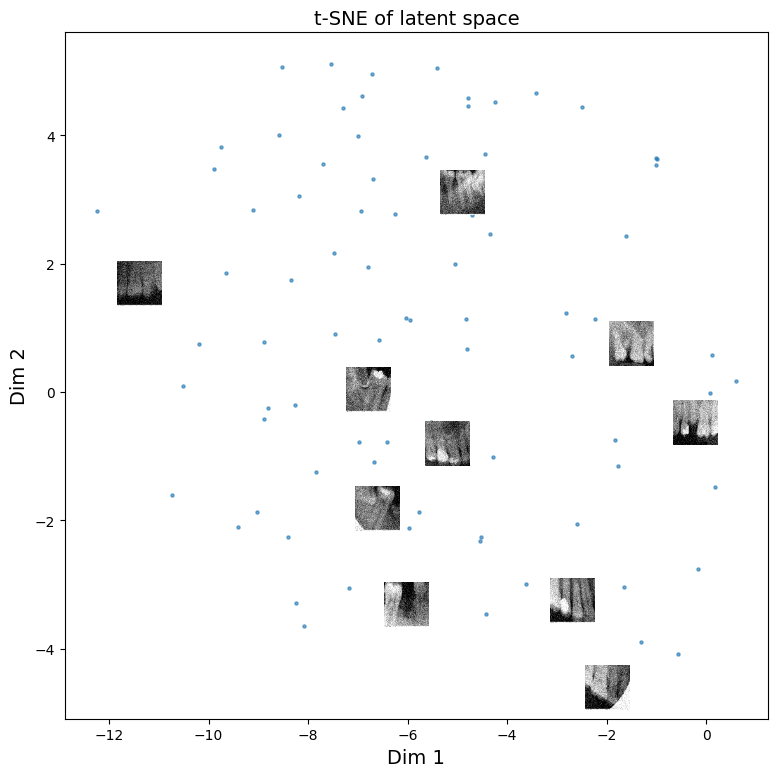

In [48]:
# visualize the CNN-AE latent space
plot_tsne_with_thumbnails(cnn_encoder, X_train_cnn, thumb_zoom=0.5)